In [ ]:
import pandas as pd
import glob
import matplotlib.pyplot as plt

# result_から始まる全てのcsvファイルを取得
csv_files = glob.glob("result_*.csv")
angle_45_files = [file for file in csv_files if "_0-45degree" in file]  # *_0_45degree.csv files
normal_files = [file for file in csv_files if "_0-45degree" not in file]  # other csv files

# CSVファイルを読み込み、DataFrameに結合
dataframes_normal = [pd.read_csv(file) for file in normal_files]
dataframes_angle_45 = [pd.read_csv(file) for file in angle_45_files]

df_normal = pd.concat(dataframes_normal, ignore_index=True)
df_angle_45 = pd.concat(dataframes_angle_45, ignore_index=True)

# ClusterNameでソート
df_normal = df_normal.sort_values("ClusterName")
df_angle_45 = df_angle_45.sort_values("ClusterName")

# プロットの作成
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 12))

# 最初のプロット（Time Since Collisionのエラーバー付きプロット）for normal files
ax1.errorbar(df_normal["ClusterName"], df_normal["MCMAC_TSC0"], 
             yerr=[abs(df_normal["MCMAC_TSC0"] - df_normal["MCMAC_TSC0.lower"]), 
                   abs(df_normal["MCMAC_TSC0.upper"] - df_normal["MCMAC_TSC0"])], 
             fmt='o', label="MCMAC_TSC0 (normal)", capsize=5)

ax1.errorbar(df_normal["ClusterName"], df_normal["MCMAC_TSC1"], 
             yerr=[abs(df_normal["MCMAC_TSC1"] - df_normal["MCMAC_TSC1.lower"]), 
                   abs(df_normal["MCMAC_TSC1.upper"] - df_normal["MCMAC_TSC1"])], 
             fmt='o', label="MCMAC_TSC1 (normal)", capsize=5)

# Simulation_TSC is plotted only for normal files
ax1.scatter(df_normal["ClusterName"], df_normal["Simulation_TSC"], marker='o', 
            label="Simulation_TSC", color='black')

# エラーバー付きプロット for angle_45 files (without Simulation_TSC)
ax1.errorbar(df_angle_45["ClusterName"], df_angle_45["MCMAC_TSC0"], 
             yerr=[abs(df_angle_45["MCMAC_TSC0"] - df_angle_45["MCMAC_TSC0.lower"]), 
                   abs(df_angle_45["MCMAC_TSC0.upper"] - df_angle_45["MCMAC_TSC0"])], 
             fmt='o', label="MCMAC_TSC0 (45 degree)", capsize=5, color='orange')

ax1.errorbar(df_angle_45["ClusterName"], df_angle_45["MCMAC_TSC1"], 
             yerr=[abs(df_angle_45["MCMAC_TSC1"] - df_angle_45["MCMAC_TSC1.lower"]), 
                   abs(df_angle_45["MCMAC_TSC1.upper"] - df_angle_45["MCMAC_TSC1"])], 
             fmt='o', label="MCMAC_TSC1 (45 degree)", capsize=5, color='blue')

ax1.set_xlabel("Cluster Name", fontsize=17)
ax1.set_ylabel("Time Since Collision (Gyr)", fontsize=17)
ax1.legend()

# 2つ目のプロット（Absolute Residualのプロット）
residual_MCMAC_TSC0_normal = df_normal["MCMAC_TSC0"] - df_normal["Simulation_TSC"]
residual_MCMAC_TSC1_normal = df_normal["MCMAC_TSC1"] - df_normal["Simulation_TSC"]

residual_MCMAC_TSC0_angle_45 = df_angle_45["MCMAC_TSC0"] - df_normal["Simulation_TSC"]
residual_MCMAC_TSC1_angle_45 = df_angle_45["MCMAC_TSC1"] - df_normal["Simulation_TSC"]

# ClusterNameに基づく直線プロット for residuals (Normal)
ax2.plot(df_normal["ClusterName"], residual_MCMAC_TSC0_normal, 'o-', 
         label="MCMAC_TSC0 - Simulation_TSC (normal)", color='blue')

ax2.plot(df_normal["ClusterName"], residual_MCMAC_TSC1_normal, 'o-', 
         label="MCMAC_TSC1 - Simulation_TSC (normal)")

# ClusterNameに基づく直線プロット for residuals (45 degree)
ax2.plot(df_angle_45["ClusterName"], residual_MCMAC_TSC0_angle_45, 'o-', 
         label="MCMAC_TSC0 - Simulation_TSC (45 degree)", color='orange')

ax2.plot(df_angle_45["ClusterName"], residual_MCMAC_TSC1_angle_45, 'o-', 
         label="MCMAC_TSC1 - Simulation_TSC (45 degree)", color='blue')
ax2.axhline(y=0, color='black', linestyle='--', linewidth=2)


ax2.set_xlabel("Cluster Name", fontsize=17)
ax2.set_ylabel("Absolute Residual (Gyr)", fontsize=17)
ax2.legend()

# グラフを表示
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
import glob
import matplotlib.pyplot as plt

# result_から始まる全てのcsvファイルを取得
csv_files = glob.glob("result_*.csv")
angle_45_files = [file for file in csv_files if "_0-45degree" in file]  # *_0_45degree.csv files
normal_files = [file for file in csv_files if "_0-45degree" not in file]  # other csv files

# CSVファイルを読み込み、DataFrameに結合
dataframes_normal = [pd.read_csv(file) for file in normal_files]
dataframes_angle_45 = [pd.read_csv(file) for file in angle_45_files]

df_normal = pd.concat(dataframes_normal, ignore_index=True)
df_angle_45 = pd.concat(dataframes_angle_45, ignore_index=True)

# ClusterNameでソート
df_normal = df_normal.sort_values("ClusterName")
df_angle_45 = df_angle_45.sort_values("ClusterName")

# プロットの作成
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 12))

# 最初のプロット（Time Since Collisionのエラーバー付きプロット）for normal files
# ax1.errorbar(df_normal["ClusterName"], df_normal["MCMAC_TSC0"], 
#              yerr=[abs(df_normal["MCMAC_TSC0"] - df_normal["MCMAC_TSC0.lower"]), 
#                    abs(df_normal["MCMAC_TSC0.upper"] - df_normal["MCMAC_TSC0"])], 
#              fmt='o', label="MCMAC_TSC0 (normal)", capsize=5)

ax1.errorbar(df_normal["ClusterName"], df_normal["MCMAC_TSC1"], 
             yerr=[abs(df_normal["MCMAC_TSC1"] - df_normal["MCMAC_TSC1.lower"]), 
                   abs(df_normal["MCMAC_TSC1.upper"] - df_normal["MCMAC_TSC1"])], 
             fmt='o', label="MCMAC_TSC1 (normal)", capsize=5)

# Simulation_TSC is plotted only for normal files
ax1.scatter(df_normal["ClusterName"], df_normal["Simulation_TSC"], marker='o', 
            label="Simulation_TSC", color='black')

# エラーバー付きプロット for angle_45 files (without Simulation_TSC)
# ax1.errorbar(df_angle_45["ClusterName"], df_angle_45["MCMAC_TSC0"], 
#              yerr=[abs(df_angle_45["MCMAC_TSC0"] - df_angle_45["MCMAC_TSC0.lower"]), 
#                    abs(df_angle_45["MCMAC_TSC0.upper"] - df_angle_45["MCMAC_TSC0"])], 
#              fmt='o', label="MCMAC_TSC0 (45 degree)", capsize=5, color='red')

ax1.errorbar(df_angle_45["ClusterName"], df_angle_45["MCMAC_TSC1"], 
             yerr=[abs(df_angle_45["MCMAC_TSC1"] - df_angle_45["MCMAC_TSC1.lower"]), 
                   abs(df_angle_45["MCMAC_TSC1.upper"] - df_angle_45["MCMAC_TSC1"])], 
             fmt='o', label="MCMAC_TSC1 (45 degree)", capsize=5, color='green')

ax1.set_xlabel("Cluster Name")
ax1.set_ylabel("Time Since Collision (Gyr)")
ax1.legend()

# 2つ目のプロット（Absolute Residualのプロット）
residual_MCMAC_TSC0_normal = df_normal["MCMAC_TSC0"] - df_normal["Simulation_TSC"]
residual_MCMAC_TSC1_normal = df_normal["MCMAC_TSC1"] - df_normal["Simulation_TSC"]

residual_MCMAC_TSC0_angle_45 = df_angle_45["MCMAC_TSC0"] - df_normal["Simulation_TSC"]
residual_MCMAC_TSC1_angle_45 = df_angle_45["MCMAC_TSC1"] - df_normal["Simulation_TSC"]

# ClusterNameに基づく直線プロット for residuals (Normal)
# ax2.plot(df_normal["ClusterName"], residual_MCMAC_TSC0_normal, 'o-', 
#          label="MCMAC_TSC0 - Simulation_TSC (normal)")

ax2.plot(df_normal["ClusterName"], residual_MCMAC_TSC1_normal, 'o-', 
         label="MCMAC_TSC1 - Simulation_TSC (normal)")

# ClusterNameに基づく直線プロット for residuals (45 degree)
# ax2.plot(df_angle_45["ClusterName"], residual_MCMAC_TSC0_angle_45, 'o-', 
#          label="MCMAC_TSC0 - Simulation_TSC (45 degree)", color='red')

ax2.plot(df_angle_45["ClusterName"], residual_MCMAC_TSC1_angle_45, 'o-', 
         label="MCMAC_TSC1 - Simulation_TSC (45 degree)", color='green')
ax2.axhline(y=0, color='black', linestyle='--', linewidth=2)


ax2.set_xlabel("Cluster Name")
ax2.set_ylabel("Absolute Residual (Gyr)")
ax2.legend()
# グラフを表示
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
import glob
import matplotlib.pyplot as plt

# result_から始まる全てのcsvファイルを取得
csv_files = glob.glob("result_*.csv")
angle_45_files = [file for file in csv_files if "_0-45degree" in file]  # *_0_45degree.csv files
normal_files = [file for file in csv_files if "_0-45degree" not in file]  # other csv files

# CSVファイルを読み込み、DataFrameに結合
dataframes_normal = [pd.read_csv(file) for file in normal_files]
dataframes_angle_45 = [pd.read_csv(file) for file in angle_45_files]

df_normal = pd.concat(dataframes_normal, ignore_index=True)
df_angle_45 = pd.concat(dataframes_angle_45, ignore_index=True)

# ClusterNameでソート
df_normal = df_normal.sort_values("ClusterName")
df_angle_45 = df_angle_45.sort_values("ClusterName")

# プロットの作成
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 12))

# Exclude cluster 'A1644' from the normal and angle_45 data for TSC0
df_normal_no_A1644 = df_normal[df_normal["ClusterName"] != "A1644"]
df_angle_45_no_A1644 = df_angle_45[df_angle_45["ClusterName"] != "A1644"]

# 最初のプロット（Time Since Collisionのエラーバー付きプロット）for normal files excluding A1644
ax1.errorbar(df_normal_no_A1644["ClusterName"], df_normal_no_A1644["MCMAC_TSC0"], 
             yerr=[abs(df_normal_no_A1644["MCMAC_TSC0"] - df_normal_no_A1644["MCMAC_TSC0.lower"]), 
                   abs(df_normal_no_A1644["MCMAC_TSC0.upper"] - df_normal_no_A1644["MCMAC_TSC0"])], 
             fmt='o', label="MCMAC_TSC0 (normal)", capsize=5)

# Simulation_TSC is plotted only for normal files, including A1644
ax1.scatter(df_normal["ClusterName"], df_normal["Simulation_TSC"], marker='o', 
            label="Simulation_TSC", color='black')

# エラーバー付きプロット for angle_45 files (excluding A1644 for TSC0)
ax1.errorbar(df_angle_45_no_A1644["ClusterName"], df_angle_45_no_A1644["MCMAC_TSC0"], 
             yerr=[abs(df_angle_45_no_A1644["MCMAC_TSC0"] - df_angle_45_no_A1644["MCMAC_TSC0.lower"]), 
                   abs(df_angle_45_no_A1644["MCMAC_TSC0.upper"] - df_angle_45_no_A1644["MCMAC_TSC0"])], 
             fmt='o', label="MCMAC_TSC0 (45 degree)", capsize=5, color='orange')
# Show TSC1 results only for A1644
if "A1644" in df_normal["ClusterName"].values:
    # Select the row corresponding to A1644
    A1644_data_normal = df_normal[df_normal["ClusterName"] == "A1644"]
    A1644_data_angle_45 = df_angle_45[df_angle_45["ClusterName"] == "A1644"]

    # Plot TSC1 results for A1644
    ax1.errorbar(A1644_data_normal["ClusterName"], A1644_data_normal["MCMAC_TSC1"], 
                 yerr=[abs(A1644_data_normal["MCMAC_TSC1"] - A1644_data_normal["MCMAC_TSC1.lower"]), 
                       abs(A1644_data_normal["MCMAC_TSC1.upper"] - A1644_data_normal["MCMAC_TSC1"])], 
                 fmt='o', label="MCMAC_TSC1 (normal)", capsize=5, color='green')

    # Add TSC1 for 45 degree data if required
    ax1.errorbar(A1644_data_angle_45["ClusterName"], A1644_data_angle_45["MCMAC_TSC1"], 
                 yerr=[abs(A1644_data_angle_45["MCMAC_TSC1"] - A1644_data_angle_45["MCMAC_TSC1.lower"]), 
                       abs(A1644_data_angle_45["MCMAC_TSC1.upper"] - A1644_data_angle_45["MCMAC_TSC1"])], 
                 fmt='o', label="MCMAC_TSC1 (45 degree)", capsize=5, color='red')

ax1.set_xlabel("Cluster Name", fontsize=17)
ax1.set_ylabel("Time Since Collision (Gyr)", fontsize=17)
ax1.legend()

# 2つ目のプロット（Absolute Residualのプロット）
residual_MCMAC_TSC0_normal = df_normal["MCMAC_TSC0"] - df_normal["Simulation_TSC"]
residual_MCMAC_TSC1_normal = df_normal["MCMAC_TSC1"] - df_normal["Simulation_TSC"]

residual_MCMAC_TSC0_angle_45 = df_angle_45["MCMAC_TSC0"] - df_normal["Simulation_TSC"]
residual_MCMAC_TSC1_angle_45 = df_angle_45["MCMAC_TSC1"] - df_normal["Simulation_TSC"]

# ClusterNameに基づく直線プロット for residuals (Normal)
ax2.plot(df_normal["ClusterName"], residual_MCMAC_TSC0_normal, 'o-', 
         label="MCMAC_TSC0 - Simulation_TSC (normal)", color='blue')

# ClusterNameに基づく直線プロット for residuals (45 degree)
ax2.plot(df_angle_45["ClusterName"], residual_MCMAC_TSC0_angle_45, 'o-', 
         label="MCMAC_TSC0 - Simulation_TSC (45 degree)", color='orange')

ax2.axhline(y=0, color='black', linestyle='--', linewidth=2)

ax2.set_xlabel("Cluster Name", fontsize=17)
ax2.set_ylabel("Absolute Residual (Gyr)", fontsize=17)
ax2.legend()

# グラフを表示
plt.tight_layout()
plt.show()


/home/ryuseikano/anaconda3/envs/Clusters/lib/python3.12/site-packages/matplotlib/cbook.py:1699: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  return math.isfinite(val)


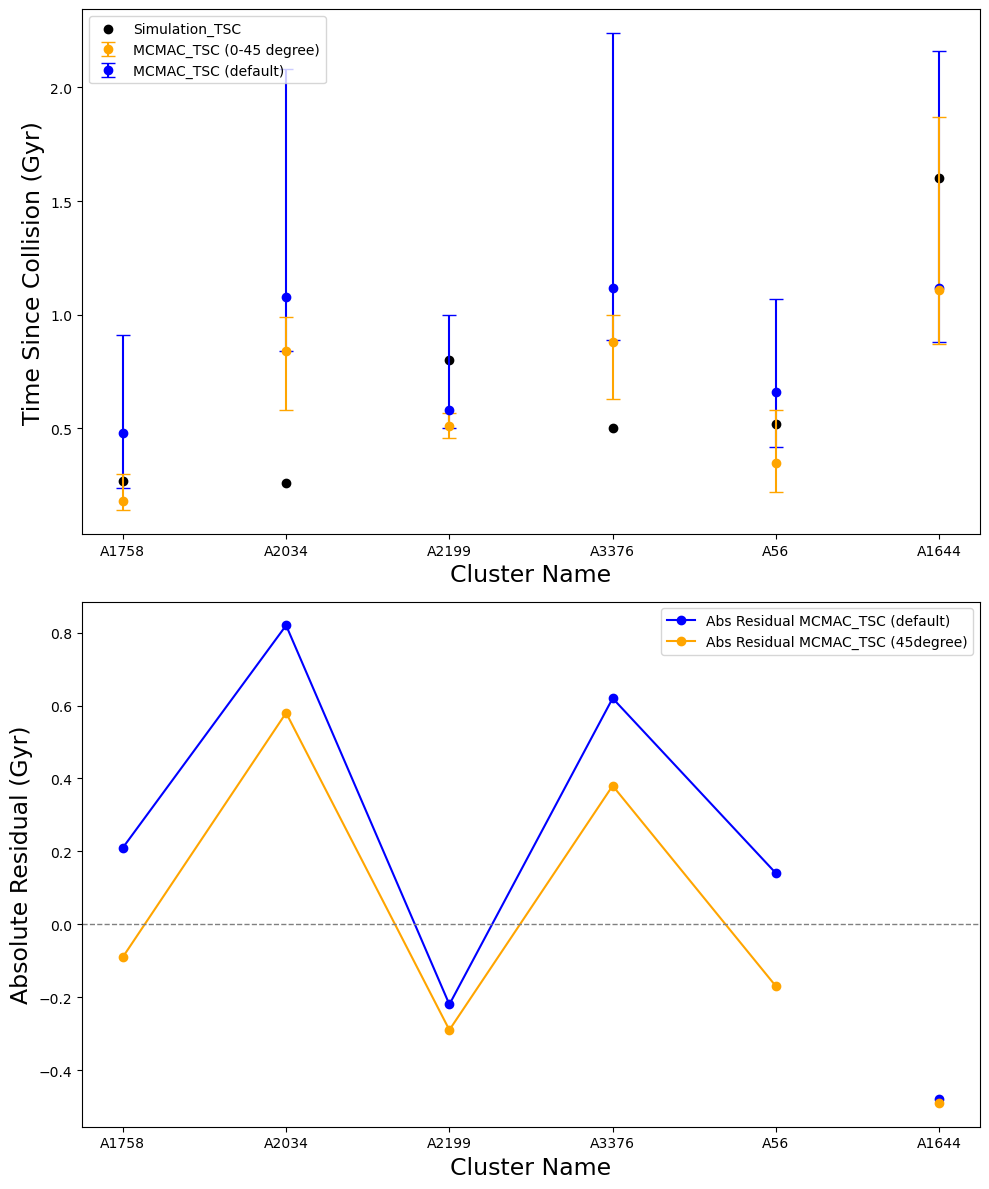

In [4]:
import pandas as pd
import glob
import matplotlib.pyplot as plt

# result_から始まる全てのcsvファイルを取得
csv_files = glob.glob("result_*.csv")
angle_45_files = [file for file in csv_files if "_0-45degree" in file]  # *_0_45degree.csv files
normal_files = [file for file in csv_files if "_0-45degree" not in file]  # other csv files

# CSVファイルを読み込み、DataFrameに結合
dataframes_normal = [pd.read_csv(file) for file in normal_files]
dataframes_angle_45 = [pd.read_csv(file) for file in angle_45_files]

df_normal = pd.concat(dataframes_normal, ignore_index=True)
df_angle_45 = pd.concat(dataframes_angle_45, ignore_index=True)

# ClusterNameでソート
df_normal = df_normal.sort_values("ClusterName")
df_angle_45 = df_angle_45.sort_values("ClusterName")

# プロットの作成
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 12))

# Exclude cluster 'A1644' from the normal and angle_45 data for TSC0
df_normal_no_A1644 = df_normal[df_normal["ClusterName"] != "A1644"]
df_angle_45_no_A1644 = df_angle_45[df_angle_45["ClusterName"] != "A1644"]

# 最初のプロット（Time Since Collisionのエラーバー付きプロット）for normal files excluding A1644
ax1.errorbar(df_normal_no_A1644["ClusterName"], df_normal_no_A1644["MCMAC_TSC0"], 
             yerr=[abs(df_normal_no_A1644["MCMAC_TSC0"] - df_normal_no_A1644["MCMAC_TSC0.lower"]), 
                   abs(df_normal_no_A1644["MCMAC_TSC0.upper"] - df_normal_no_A1644["MCMAC_TSC0"])], 
             fmt='o', capsize=5, color="blue")



# エラーバー付きプロット for angle_45 files (excluding A1644 for TSC0)
ax1.errorbar(df_angle_45_no_A1644["ClusterName"], df_angle_45_no_A1644["MCMAC_TSC0"], 
             yerr=[abs(df_angle_45_no_A1644["MCMAC_TSC0"] - df_angle_45_no_A1644["MCMAC_TSC0.lower"]), 
                   abs(df_angle_45_no_A1644["MCMAC_TSC0.upper"] - df_angle_45_no_A1644["MCMAC_TSC0"])], 
             fmt='o', label="MCMAC_TSC (0-45 degree)", capsize=5, color='orange')

# Show TSC1 results only for A1644
if "A1644" in df_normal["ClusterName"].values:
    # Select the row corresponding to A1644
    A1644_data_normal = df_normal[df_normal["ClusterName"] == "A1644"]
    A1644_data_angle_45 = df_angle_45[df_angle_45["ClusterName"] == "A1644"]

    # Plot TSC1 results for A1644
    ax1.errorbar(A1644_data_normal["ClusterName"], A1644_data_normal["MCMAC_TSC1"], 
                 yerr=[abs(A1644_data_normal["MCMAC_TSC1"] - A1644_data_normal["MCMAC_TSC1.lower"]), 
                       abs(A1644_data_normal["MCMAC_TSC1.upper"] - A1644_data_normal["MCMAC_TSC1"])], 
                 fmt='o', label="MCMAC_TSC (default)", capsize=5, color='blue')

    # Add TSC1 for 45 degree data if required
    ax1.errorbar(A1644_data_angle_45["ClusterName"], A1644_data_angle_45["MCMAC_TSC1"], 
                 yerr=[abs(A1644_data_angle_45["MCMAC_TSC1"] - A1644_data_angle_45["MCMAC_TSC1.lower"]), 
                       abs(A1644_data_angle_45["MCMAC_TSC1.upper"] - A1644_data_angle_45["MCMAC_TSC1"])], 
                 fmt='o', capsize=5, color='orange')

# Simulation_TSC is plotted only for normal files, including A1644
ax1.scatter(df_normal["ClusterName"], df_normal["Simulation_TSC"], marker='o', 
            label="Simulation_TSC", color='black')

ax1.set_xlabel("Cluster Name", fontsize=17)
ax1.set_ylabel("Time Since Collision (Gyr)", fontsize=17)
ax1.legend(loc='upper left')

# 2つ目のプロット（Absolute Residual (TSC - TSC_Catalog)のプロット）
residual_MCMAC_TSC0_normal = df_normal_no_A1644["MCMAC_TSC0"] - df_normal_no_A1644["Simulation_TSC"]
residual_MCMAC_TSC1_normal = A1644_data_normal["MCMAC_TSC1"] - A1644_data_normal["Simulation_TSC"]

residual_MCMAC_TSC0_normal_angle_45 = df_angle_45_no_A1644["MCMAC_TSC0"] - df_angle_45_no_A1644["Simulation_TSC"]
residual_MCMAC_TSC1_normal_angle_45 = A1644_data_angle_45["MCMAC_TSC1"] - A1644_data_angle_45["Simulation_TSC"]


# プロット for TSC0 (default)
ax2.plot(df_normal_no_A1644["ClusterName"], residual_MCMAC_TSC0_normal, label="Abs Residual MCMAC_TSC (default)", color='blue', marker='o')
# プロット for TSC0 (45degree)
ax2.plot(df_normal_no_A1644["ClusterName"], residual_MCMAC_TSC0_normal_angle_45, label="Abs Residual MCMAC_TSC (45degree)", color='orange', marker='o')

# プロット for TSC1 (default) for A1644
ax2.plot(A1644_data_normal["ClusterName"], residual_MCMAC_TSC1_normal, color='blue', marker='o')
# プロット for TSC1 (45degree) for A1644
ax2.plot(A1644_data_normal["ClusterName"], residual_MCMAC_TSC1_normal_angle_45, color='orange', marker='o')

ax2.set_xlabel("Cluster Name", fontsize=17)
ax2.set_ylabel("Absolute Residual (Gyr)", fontsize=17)
ax2.axhline(y=0, color='gray', linestyle='--', linewidth=1)
ax2.legend()

plt.tight_layout()
plt.show()

/home/ryuseikano/anaconda3/envs/Clusters/lib/python3.12/site-packages/matplotlib/cbook.py:1699: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  return math.isfinite(val)


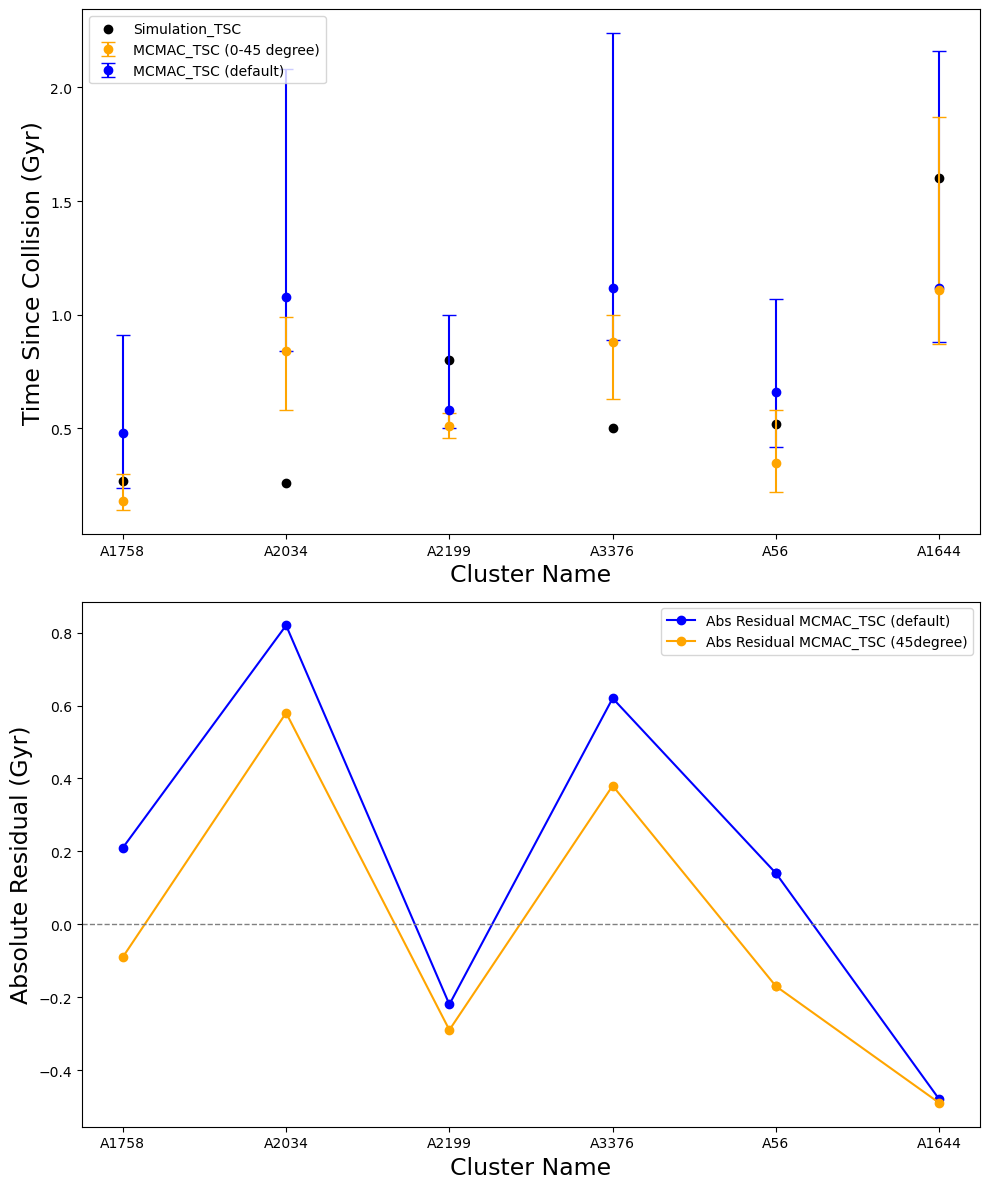

In [6]:
import pandas as pd
import glob
import matplotlib.pyplot as plt

# result_から始まる全てのcsvファイルを取得
csv_files = glob.glob("result_*.csv")
angle_45_files = [file for file in csv_files if "_0-45degree" in file]  # *_0_45degree.csv files
normal_files = [file for file in csv_files if "_0-45degree" not in file]  # other csv files

# CSVファイルを読み込み、DataFrameに結合
dataframes_normal = [pd.read_csv(file) for file in normal_files]
dataframes_angle_45 = [pd.read_csv(file) for file in angle_45_files]

df_normal = pd.concat(dataframes_normal, ignore_index=True)
df_angle_45 = pd.concat(dataframes_angle_45, ignore_index=True)

# ClusterNameでソート
df_normal = df_normal.sort_values("ClusterName")
df_angle_45 = df_angle_45.sort_values("ClusterName")

# プロットの作成
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 12))

# Exclude cluster 'A1644' from the normal and angle_45 data for TSC0
df_normal_no_A1644 = df_normal[df_normal["ClusterName"] != "A1644"]
df_angle_45_no_A1644 = df_angle_45[df_angle_45["ClusterName"] != "A1644"]

# 最初のプロット（Time Since Collisionのエラーバー付きプロット）for normal files excluding A1644
ax1.errorbar(df_normal_no_A1644["ClusterName"], df_normal_no_A1644["MCMAC_TSC0"], 
             yerr=[abs(df_normal_no_A1644["MCMAC_TSC0"] - df_normal_no_A1644["MCMAC_TSC0.lower"]), 
                   abs(df_normal_no_A1644["MCMAC_TSC0.upper"] - df_normal_no_A1644["MCMAC_TSC0"])], 
             fmt='o', capsize=5, color="blue")

# エラーバー付きプロット for angle_45 files (excluding A1644 for TSC0)
ax1.errorbar(df_angle_45_no_A1644["ClusterName"], df_angle_45_no_A1644["MCMAC_TSC0"], 
             yerr=[abs(df_angle_45_no_A1644["MCMAC_TSC0"] - df_angle_45_no_A1644["MCMAC_TSC0.lower"]), 
                   abs(df_angle_45_no_A1644["MCMAC_TSC0.upper"] - df_angle_45_no_A1644["MCMAC_TSC0"])], 
             fmt='o', label="MCMAC_TSC (0-45 degree)", capsize=5, color='orange')

# Show TSC1 results only for A1644
if "A1644" in df_normal["ClusterName"].values:
    # Select the row corresponding to A1644
    A1644_data_normal = df_normal[df_normal["ClusterName"] == "A1644"]
    A1644_data_angle_45 = df_angle_45[df_angle_45["ClusterName"] == "A1644"]

    # Plot TSC1 results for A1644
    ax1.errorbar(A1644_data_normal["ClusterName"], A1644_data_normal["MCMAC_TSC1"], 
                 yerr=[abs(A1644_data_normal["MCMAC_TSC1"] - A1644_data_normal["MCMAC_TSC1.lower"]), 
                       abs(A1644_data_normal["MCMAC_TSC1.upper"] - A1644_data_normal["MCMAC_TSC1"])], 
                 fmt='o', label="MCMAC_TSC (default)", capsize=5, color='blue')

    # Add TSC1 for 45 degree data if required
    ax1.errorbar(A1644_data_angle_45["ClusterName"], A1644_data_angle_45["MCMAC_TSC1"], 
                 yerr=[abs(A1644_data_angle_45["MCMAC_TSC1"] - A1644_data_angle_45["MCMAC_TSC1.lower"]), 
                       abs(A1644_data_angle_45["MCMAC_TSC1.upper"] - A1644_data_angle_45["MCMAC_TSC1"])], 
                 fmt='o', capsize=5, color='orange')

# Simulation_TSC is plotted only for normal files, including A1644
ax1.scatter(df_normal["ClusterName"], df_normal["Simulation_TSC"], marker='o', 
            label="Simulation_TSC", color='black')

ax1.set_xlabel("Cluster Name", fontsize=17)
ax1.set_ylabel("Time Since Collision (Gyr)", fontsize=17)
ax1.legend(loc='upper left')

# 2つ目のプロット（Absolute Residual (TSC - TSC_Catalog)のプロット）
residual_MCMAC_TSC0_normal = df_normal_no_A1644["MCMAC_TSC0"] - df_normal_no_A1644["Simulation_TSC"]
residual_MCMAC_TSC1_normal = A1644_data_normal["MCMAC_TSC1"] - A1644_data_normal["Simulation_TSC"]

residual_MCMAC_TSC0_normal_angle_45 = df_angle_45_no_A1644["MCMAC_TSC0"] - df_angle_45_no_A1644["Simulation_TSC"]
residual_MCMAC_TSC1_normal_angle_45 = A1644_data_angle_45["MCMAC_TSC1"] - A1644_data_angle_45["Simulation_TSC"]

# プロット for TSC0 (default)
ax2.plot(df_normal_no_A1644["ClusterName"], residual_MCMAC_TSC0_normal, label="Abs Residual MCMAC_TSC (default)", color='blue', marker='o')
# プロット for TSC0 (45degree)
ax2.plot(df_normal_no_A1644["ClusterName"], residual_MCMAC_TSC0_normal_angle_45, label="Abs Residual MCMAC_TSC (45degree)", color='orange', marker='o')

# Connect the A1644 points with lines
ax2.plot([df_normal_no_A1644.iloc[-1]["ClusterName"], A1644_data_normal["ClusterName"].values[0]], 
         [residual_MCMAC_TSC0_normal.iloc[-1], residual_MCMAC_TSC1_normal.values[0]], color='blue', marker='o')

ax2.plot([df_normal_no_A1644.iloc[-1]["ClusterName"], A1644_data_normal["ClusterName"].values[0]], 
         [residual_MCMAC_TSC0_normal_angle_45.iloc[-1], residual_MCMAC_TSC1_normal_angle_45.values[0]], color='orange', marker='o')

ax2.set_xlabel("Cluster Name", fontsize=17)
ax2.set_ylabel("Absolute Residual (Gyr)", fontsize=17)
ax2.axhline(y=0, color='gray', linestyle='--', linewidth=1)
ax2.legend()

plt.tight_layout()
plt.show()
